In [ ]:
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=e8829de948b6dd9bfb38101f236cb9d05088724d32b73ba8f787369984f171d7
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=df98cb5e3c7d496f9e605d04a29dde52076930486c16b56c3b48433176d6ad4e
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9b

In [ ]:
!pip install scikit-misc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 24.5 MB/s eta 0:00:00


In [ ]:
!pip install diffxpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.7/140.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.7 MB/s eta 0:00:00


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install leidenalg

In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import gzip
import os
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc
import anndata as ad

In [ ]:
hgg_adata = sc.read_h5ad('/content/drive/MyDrive/Transcriptomics/SCPC/hgg-combined.h5ad')
lgg_adata = sc.read_h5ad('/content/drive/MyDrive/Transcriptomics/SCPC/lgg-combined.h5ad')

In [ ]:
adatas = {"LGG": lgg_adata, "HGG": hgg_adata}
adata = ad.concat(adatas, label="dataset_name", join = "outer")

/usr/local/lib/python3.10/dist-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
adata.obs_names_make_unique()

/usr/local/lib/python3.10/dist-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['AAGCGTTTCTTAGTTC-1', 'GACCGTGGTGGCAACA-1', 'TGGAGAGAGGACAACC-1', 'TCTTGCGAGTTGAAAC-1', 'TCTTGCGAGTTGAAAC-2']
  warnings.warn(


In [ ]:
adata.obs

,Sample,n_genes_by_counts,total_counts,dataset_name
AAGCGAGGTTGTCCCT,LGG-SCPCL000048,8453,36775.000000,LGG
GGCTTGGGTTGTAGCT,LGG-SCPCL000048,8447,37379.996094,LGG
TGACCCTCACTTTATC,LGG-SCPCL000048,8389,37204.968750,LGG
CTCCCTCTCTCGGTCT,LGG-SCPCL000048,8174,36409.980469,LGG
TAACGACGTAACCCTA,LGG-SCPCL000048,8352,38080.906250,LGG
...,...,...,...,...
GTGAGTTTCACTTTGT,HGG-SCPCL000008,1054,1519.000366,HGG
GATCACAAGAAGTCAT,HGG-SCPCL000008,1028,1474.000244,HGG
TAATTCCGTTCTCTCG,HGG-SCPCL000008,899,1201.000000,HGG
CGAAGGAAGTAGAGTT,HGG-SCPCL000008,964,1457.000244,HGG


In [ ]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [ ]:
adata

AnnData object with n_obs × n_vars = 74175 × 5453
    obs: 'Sample', 'n_genes_by_counts', 'total_counts', 'dataset_name'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [ ]:
adata.obs

,Sample,n_genes_by_counts,total_counts,dataset_name
AAGCGAGGTTGTCCCT,LGG-SCPCL000048,2075,23144.726562,LGG
GGCTTGGGTTGTAGCT,LGG-SCPCL000048,2031,23034.007812,LGG
TGACCCTCACTTTATC,LGG-SCPCL000048,2057,22826.179688,LGG
CTCCCTCTCTCGGTCT,LGG-SCPCL000048,2035,22249.214844,LGG
TAACGACGTAACCCTA,LGG-SCPCL000048,2069,23722.716797,LGG
...,...,...,...,...
GTGAGTTTCACTTTGT,HGG-SCPCL000008,645,1082.644409,HGG
GATCACAAGAAGTCAT,HGG-SCPCL000008,625,1030.448730,HGG
TAATTCCGTTCTCTCG,HGG-SCPCL000008,525,805.704163,HGG
CGAAGGAAGTAGAGTT,HGG-SCPCL000008,576,1041.979004,HGG


In [ ]:
sc.pp.filter_genes(adata, min_cells = 100)

In [ ]:
adata.obs.groupby('Sample').count()

,n_genes_by_counts,total_counts,dataset_name
Sample,,,
HGG-SCPCL000001,2583,2583,2583
HGG-SCPCL000002,993,993,993
HGG-SCPCL000003,291,291,291
HGG-SCPCL000004,535,535,535
HGG-SCPCL000005,319,319,319
HGG-SCPCL000006,1802,1802,1802
HGG-SCPCL000007,1277,1277,1277
HGG-SCPCL000008,3634,3634,3634
HGG-SCPCL000009,631,631,631


In [ ]:
adata.obs.groupby('dataset_name').count()

,Sample,n_genes_by_counts,total_counts
dataset_name,,,
LGG,47485,47485,47485
HGG,26690,26690,26690


In [ ]:
adata.layers['counts'] = adata.X.copy()

In [ ]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [ ]:
adata

AnnData object with n_obs × n_vars = 74175 × 5453
    obs: 'Sample', 'n_genes_by_counts', 'total_counts', 'dataset_name'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'log1p'
    layers: 'counts'

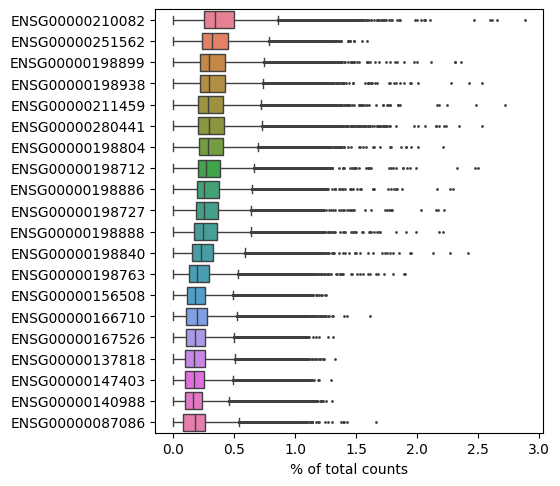

In [ ]:
sc.pl.highest_expr_genes(adata, n_top=20)

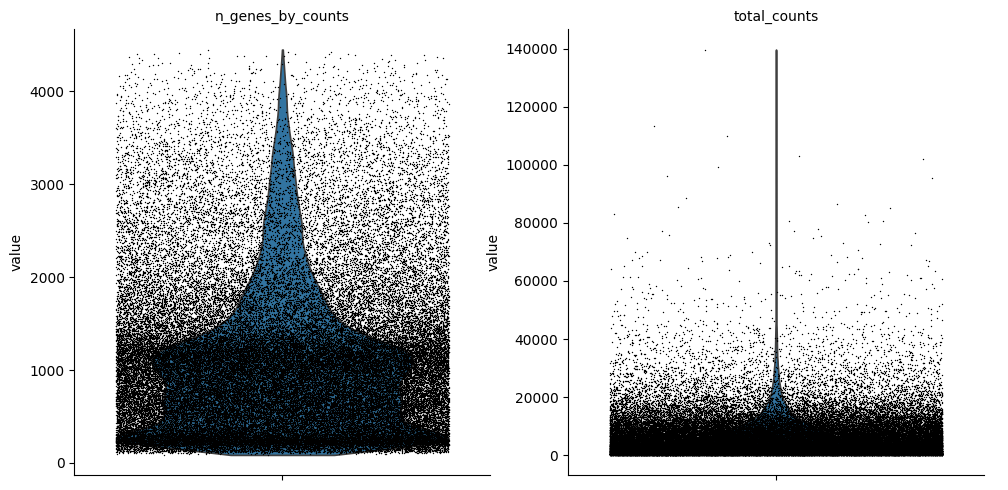

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:64: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


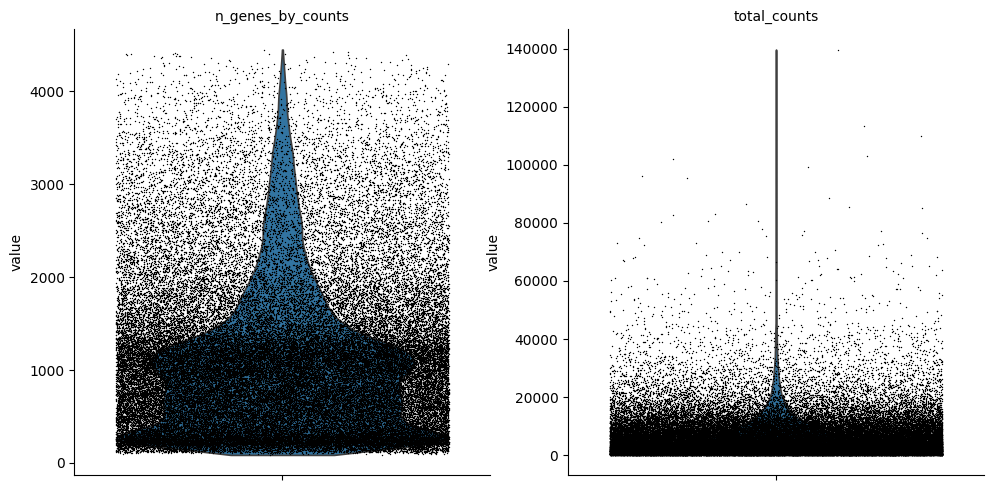

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

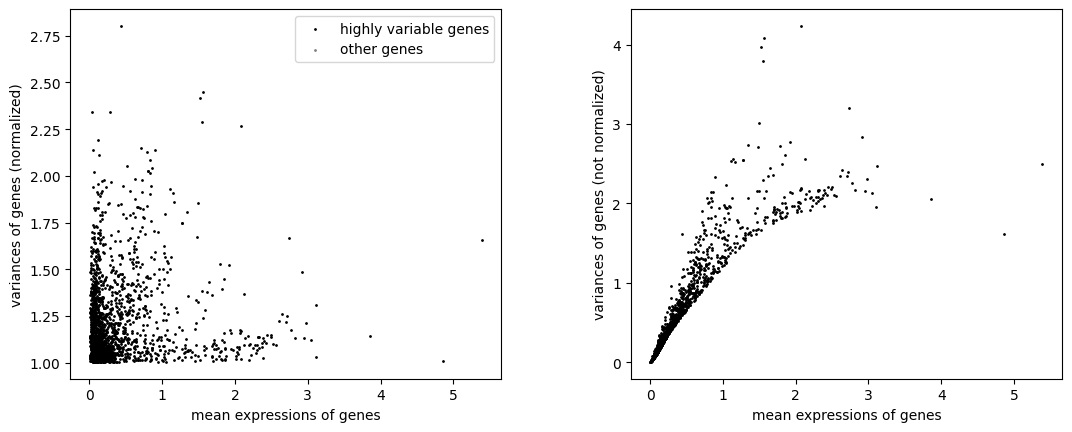

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
adata

View of AnnData object with n_obs × n_vars = 74175 × 2000
    obs: 'Sample', 'n_genes_by_counts', 'total_counts', 'dataset_name'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg'
    layers: 'counts'

In [ ]:
sc.pp.regress_out(adata, ['total_counts'])

In [ ]:
sc.pp.scale(adata, max_value=10)

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

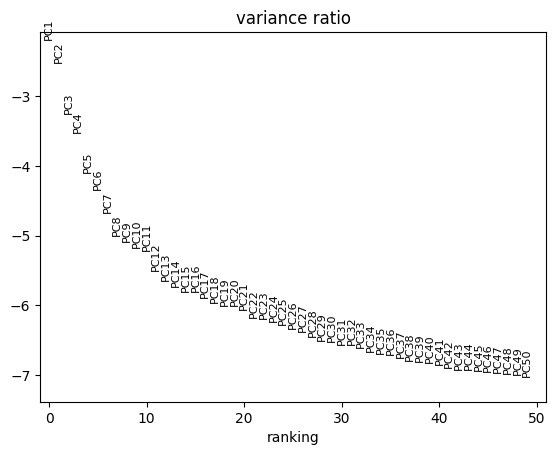

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs = 50)

In [ ]:
sc.pp.neighbors(adata, n_pcs = 30)

In [ ]:
sc.tl.umap(adata)

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


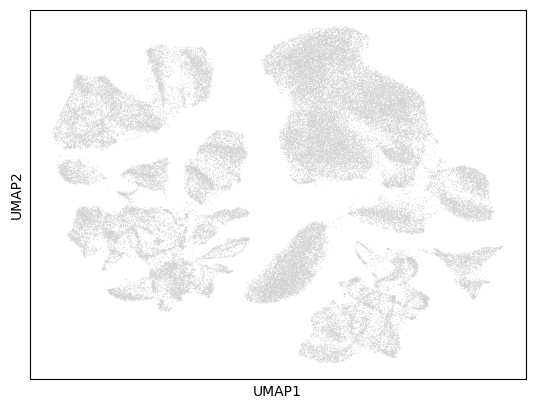

In [ ]:
sc.pl.umap(adata)

In [ ]:
sc.tl.leiden(adata, resolution = 1)
adata.obs

,Sample,n_genes_by_counts,total_counts,dataset_name,leiden,cell_types
AAGCGAGGTTGTCCCT,LGG-SCPCL000048,2075,23144.726562,LGG,24,Oligodendrocyte
GGCTTGGGTTGTAGCT,LGG-SCPCL000048,2031,23034.007812,LGG,24,Oligodendrocyte
TGACCCTCACTTTATC,LGG-SCPCL000048,2057,22826.179688,LGG,24,Oligodendrocyte
CTCCCTCTCTCGGTCT,LGG-SCPCL000048,2035,22249.214844,LGG,24,Oligodendrocyte
TAACGACGTAACCCTA,LGG-SCPCL000048,2069,23722.716797,LGG,24,Oligodendrocyte
...,...,...,...,...,...,...
GTGAGTTTCACTTTGT,HGG-SCPCL000008,645,1082.644409,HGG,17,Neuron
GATCACAAGAAGTCAT,HGG-SCPCL000008,625,1030.448730,HGG,17,Neuron
TAATTCCGTTCTCTCG,HGG-SCPCL000008,525,805.704163,HGG,17,Neuron
CGAAGGAAGTAGAGTT,HGG-SCPCL000008,576,1041.979004,HGG,17,Neuron


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


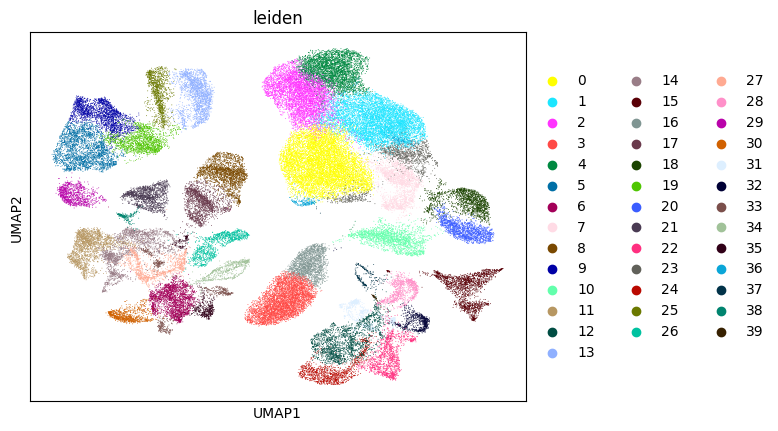

In [ ]:
sc.pl.umap(adata, color=['leiden'])

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method="t-test")

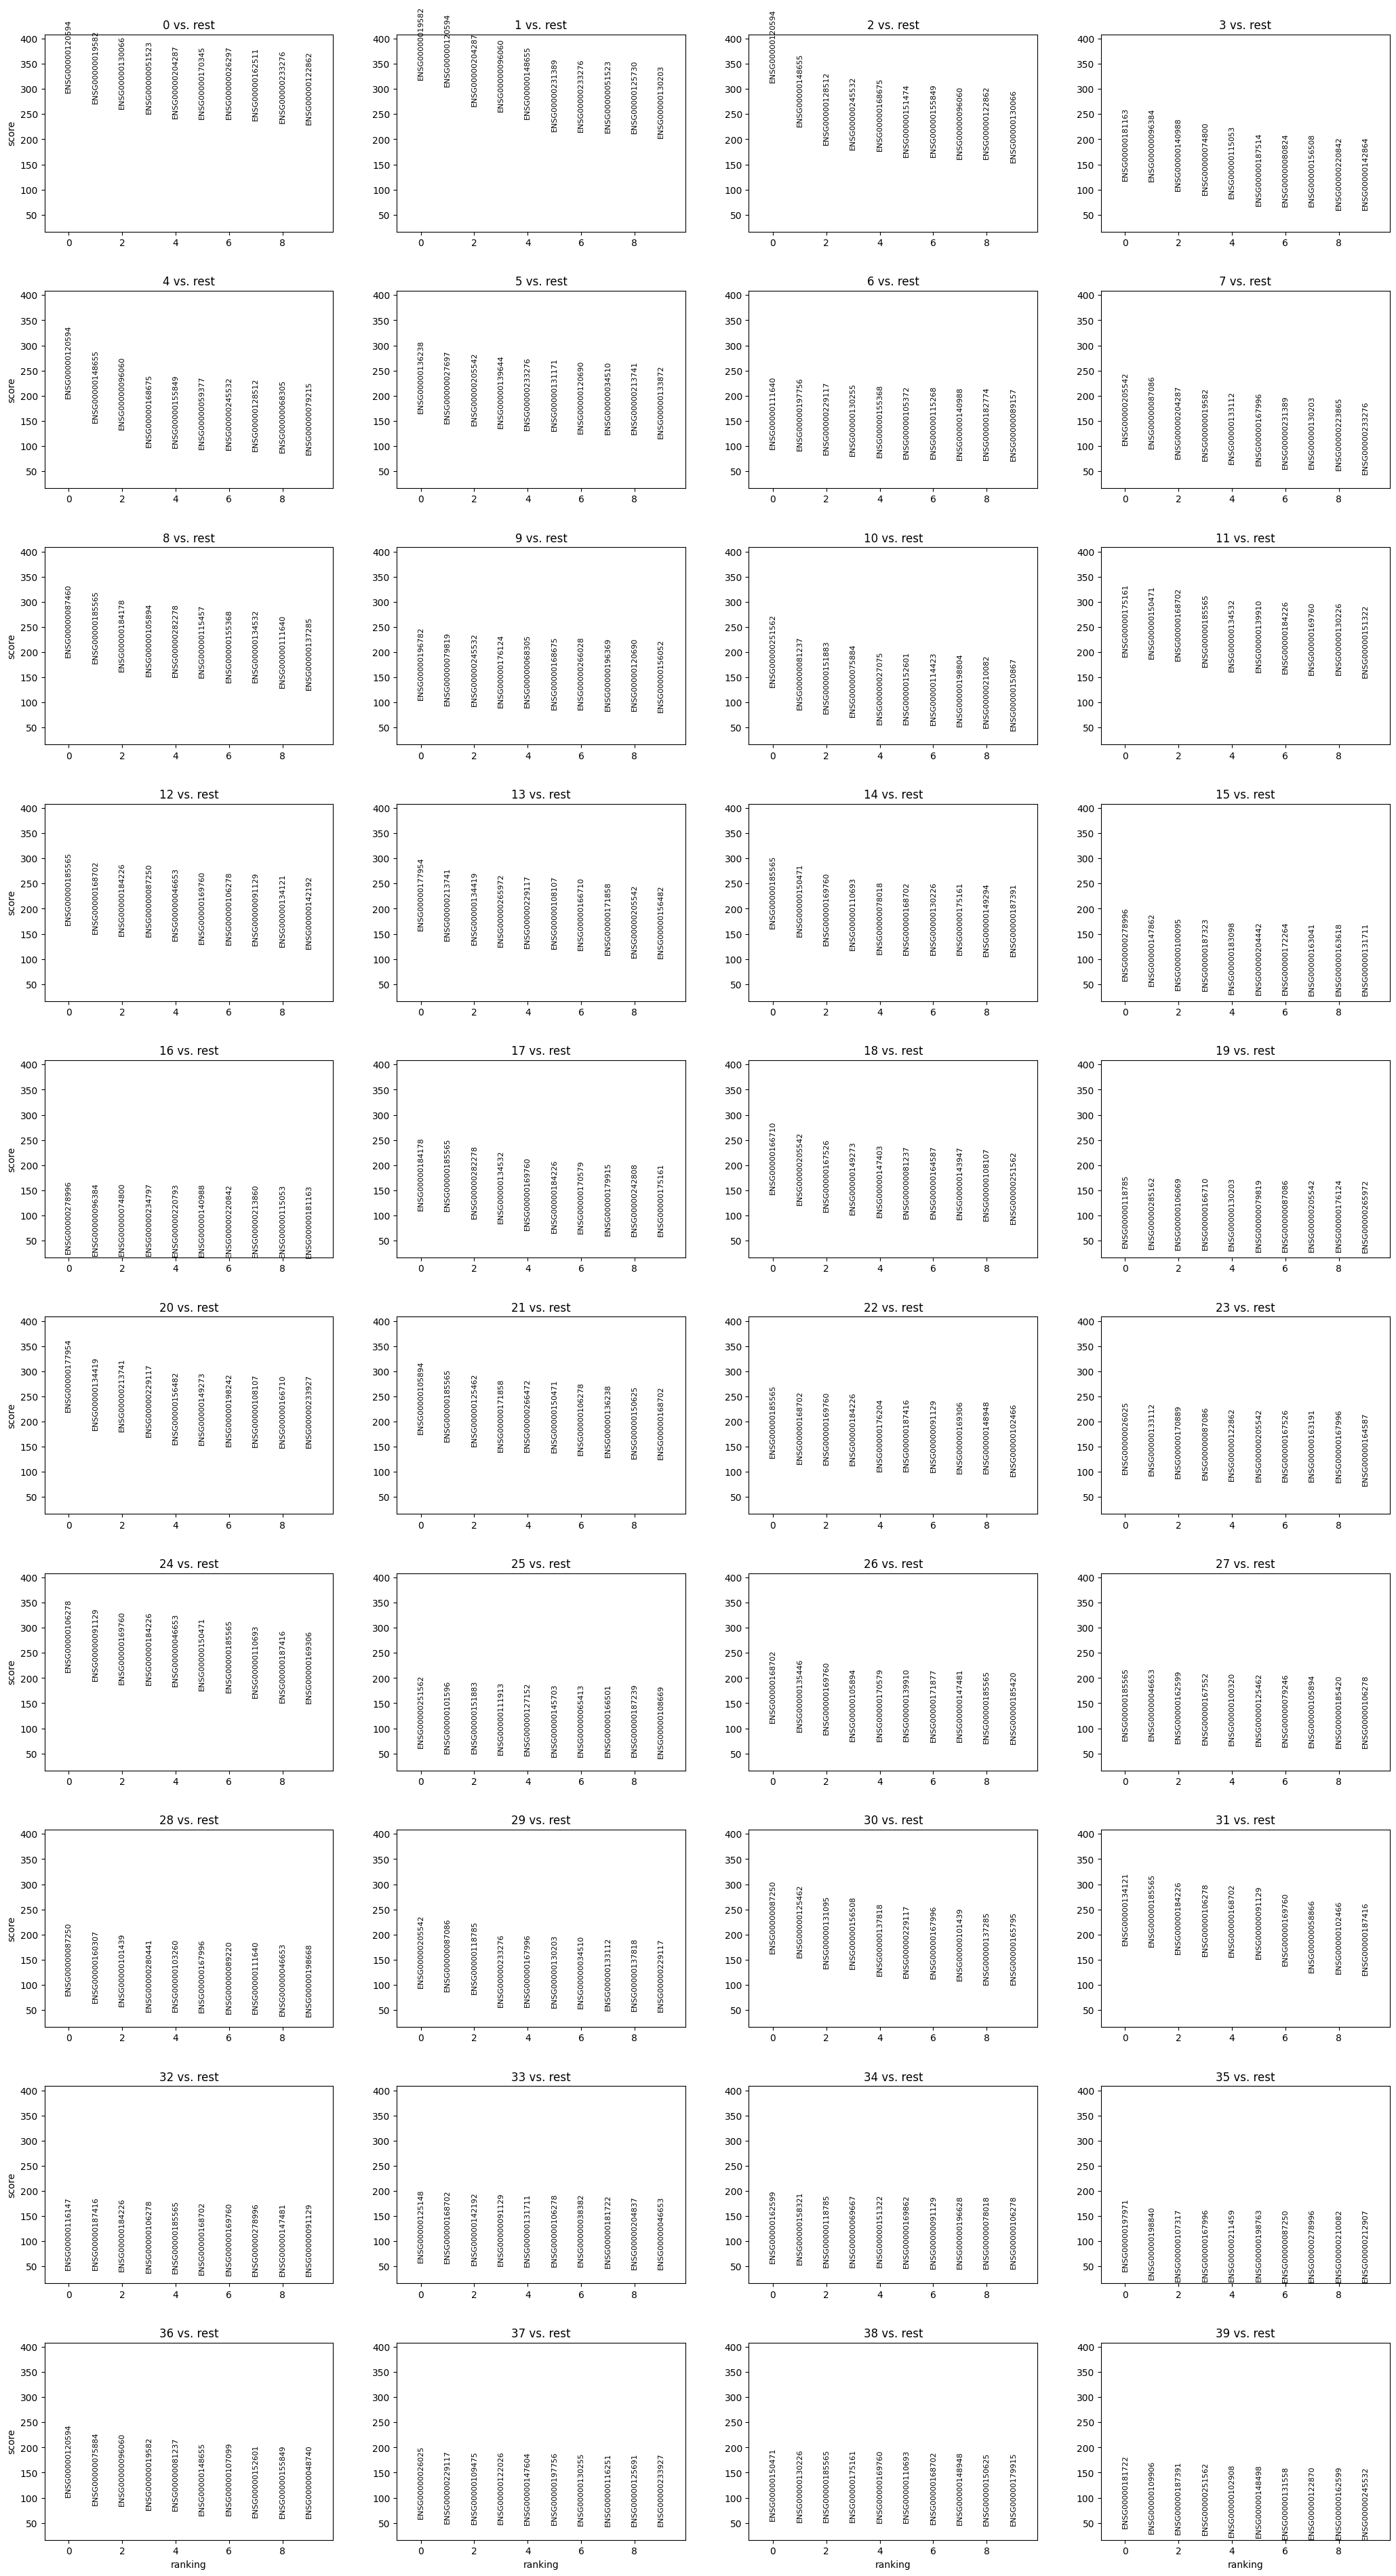

In [ ]:
sc.pl.rank_genes_groups(adata, n_genes=10)

In [ ]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,ENSG00000120594,292.392609,4.499658,0.000000,0.000000
1,0,ENSG00000019582,271.973022,4.682086,0.000000,0.000000
2,0,ENSG00000130066,260.434998,4.050502,0.000000,0.000000
3,0,ENSG00000051523,251.449860,3.522479,0.000000,0.000000
4,0,ENSG00000204287,242.105789,4.790195,0.000000,0.000000
...,...,...,...,...,...,...
213626,39,ENSG00000151150,2.120004,0.808624,0.039807,0.046432
213627,39,ENSG00000136100,2.116283,0.966901,0.040142,0.046812
213628,39,ENSG00000155508,2.098558,1.504867,0.041763,0.048650
213629,39,ENSG00000151923,2.088996,0.809260,0.042655,0.049679


In [ ]:
result = adata.uns["rank_genes_groups"]
groups = result["names"].dtype.names
top_features = {}
n_top_genes = 10  # desired number of top genes per cluster
for group in groups:
    top_features[group] = result["names"][group][:n_top_genes]

# Print the top features for each cluster
for group, features in top_features.items():
    print(f"Cluster {group} top features:")
    for feature in features:
        print(feature)
    print()

Cluster 0 top features:
ENSG00000120594
ENSG00000019582
ENSG00000130066
ENSG00000051523
ENSG00000204287
ENSG00000170345
ENSG00000026297
ENSG00000162511
ENSG00000233276
ENSG00000122862

Cluster 1 top features:
ENSG00000019582
ENSG00000120594
ENSG00000204287
ENSG00000096060
ENSG00000148655
ENSG00000231389
ENSG00000233276
ENSG00000051523
ENSG00000125730
ENSG00000130203

Cluster 2 top features:
ENSG00000120594
ENSG00000148655
ENSG00000128512
ENSG00000245532
ENSG00000168675
ENSG00000151474
ENSG00000155849
ENSG00000096060
ENSG00000122862
ENSG00000130066

Cluster 3 top features:
ENSG00000181163
ENSG00000096384
ENSG00000140988
ENSG00000074800
ENSG00000115053
ENSG00000187514
ENSG00000080824
ENSG00000156508
ENSG00000220842
ENSG00000142864

Cluster 4 top features:
ENSG00000120594
ENSG00000148655
ENSG00000096060
ENSG00000168675
ENSG00000155849
ENSG00000059377
ENSG00000245532
ENSG00000128512
ENSG00000068305
ENSG00000079215

Cluster 5 top features:
ENSG00000136238
ENSG00000027697
ENSG00000205542
ENS

In [ ]:
# Access the marker genes results from rank_genes_groups
marker_genes = adata.uns['rank_genes_groups']

# Iterate over each group and print the marker genes
for group in marker_genes['names'].dtype.names:
    print(f"Group: {group}")
    print(marker_genes['names'][group][:10])  # Print the top 10 marker genes
    print("\n")

Group: 0
['ENSG00000120594' 'ENSG00000019582' 'ENSG00000130066' 'ENSG00000051523'
 'ENSG00000204287' 'ENSG00000170345' 'ENSG00000026297' 'ENSG00000162511'
 'ENSG00000233276' 'ENSG00000122862']


Group: 1
['ENSG00000019582' 'ENSG00000120594' 'ENSG00000204287' 'ENSG00000096060'
 'ENSG00000148655' 'ENSG00000231389' 'ENSG00000233276' 'ENSG00000051523'
 'ENSG00000125730' 'ENSG00000130203']


Group: 2
['ENSG00000120594' 'ENSG00000148655' 'ENSG00000128512' 'ENSG00000245532'
 'ENSG00000168675' 'ENSG00000151474' 'ENSG00000155849' 'ENSG00000096060'
 'ENSG00000122862' 'ENSG00000130066']


Group: 3
['ENSG00000181163' 'ENSG00000096384' 'ENSG00000140988' 'ENSG00000074800'
 'ENSG00000115053' 'ENSG00000187514' 'ENSG00000080824' 'ENSG00000156508'
 'ENSG00000220842' 'ENSG00000142864']


Group: 4
['ENSG00000120594' 'ENSG00000148655' 'ENSG00000096060' 'ENSG00000168675'
 'ENSG00000155849' 'ENSG00000059377' 'ENSG00000245532' 'ENSG00000128512'
 'ENSG00000068305' 'ENSG00000079215']


Group: 5
['ENSG0000013623

In [ ]:
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("/content/drive/MyDrive/Transcriptomics/SCPC/integrated_lgg_hgg_jan31.csv")

In [ ]:
!python /content/drive/MyDrive/Transcriptomics/SCSA/SCSA.py -d /content/drive/MyDrive/Transcriptomics/SCSA/whole_v2.db -i /content/drive/MyDrive/Transcriptomics/SCPC/integrated_lgg_hgg_jan31.csv -s scanpy -g Human -f1.5 -p 0.01 -o /content/drive/MyDrive/Transcriptomics/SCPC/integrated_cell_types_jan31.txt -m txt

Version V1.1 [2020/07/03]
DB load: 47347 3 3 91969 37440
Namespace(input='/content/drive/MyDrive/Transcriptomics/SCPC/integrated_lgg_hgg_jan31.csv', output='/content/drive/MyDrive/Transcriptomics/SCPC/integrated_cell_types_jan31.txt', db='/content/drive/MyDrive/Transcriptomics/SCSA/whole_v2.db', source='scanpy', cluster='all', MarkerDB=None, foldchange=1.5, pvalue=0.01, weight=100.0, species='Human', tissue='All', outfmt='txt', celltype='normal', target='cellmarker', Gensymbol=False, norefdb=False, noprint=False, list_tissue=False)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 91969 37440
load markers: 77000
############################## Cluster 0 ##############################

Cell Num: 271
Gene Num: 298
Not Zero: 1407
Cluster 0 Gene number: 342
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                Microglial cell        10.2706   1.4  
--------

In [ ]:
# Read the text document into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Transcriptomics/SCPC/integrated_cell_types_jan31.txt', sep='\t')

In [ ]:
df

,Cell Type,Z-score,Cluster
0,Microglial cell,10.270578,0
1,Macrophage,7.460806,0
2,Monocyte,6.119533,0
3,Dendritic cell,4.948709,0
4,B cell,3.744084,0
...,...,...,...
8021,Monocyte-derived cell,-0.294929,9
8022,Acinar cell,-0.294929,9
8023,Innate Lymphoid cell,-0.295180,9
8024,Red blood cell (erythrocyte),-0.295377,9


In [ ]:
df['Z-score'] = df['Z-score'].fillna(0)

# Group the data by "Cluster" and find the cell type with the highest Z-score in each group
highest_zscores = df.groupby('Cluster')['Z-score'].idxmax()

# Extract the corresponding cell types for the highest Z-scores
cell_types_with_highest_zscores = df.loc[highest_zscores, 'Cell Type'].tolist()

In [ ]:
cell_types_with_highest_zscores

['Microglial cell',
 'Microglial cell',
 'Microglial cell',
 'Natural killer T (NKT) cell',
 'Microglial cell',
 'Natural killer T (NKT) cell',
 'Natural killer T (NKT) cell',
 'Macrophage',
 'Natural killer T (NKT) cell',
 'Natural killer T (NKT) cell',
 'Immune cell',
 'Natural killer T (NKT) cell',
 'Astrocyte',
 'Natural killer T (NKT) cell',
 'Natural killer T (NKT) cell',
 'Sertoli cell',
 'Microglial cell',
 'Neuron',
 'Microglial cell',
 'Microglial cell',
 'Microglial cell',
 'Natural killer T (NKT) cell',
 'Neuron',
 'Microglial cell',
 'Oligodendrocyte',
 'Natural killer T (NKT) cell',
 'Natural killer T (NKT) cell',
 'Natural killer T (NKT) cell',
 'Astrocyte',
 'Microglial cell',
 'Astrocyte',
 'Astrocyte',
 'Astrocyte',
 'Natural killer T (NKT) cell',
 'Astrocyte',
 'Astrocyte',
 'Microglial cell',
 'Astrocyte',
 'Natural killer T (NKT) cell',
 'Astrocyte']

In [ ]:
cluster_to_cell_type = {cluster_num: cell_type for cluster_num, cell_type in enumerate(cell_types_with_highest_zscores)}
cluster_to_cell_type

{0: 'Microglial cell',
 1: 'Microglial cell',
 2: 'Microglial cell',
 3: 'Natural killer T (NKT) cell',
 4: 'Microglial cell',
 5: 'Natural killer T (NKT) cell',
 6: 'Natural killer T (NKT) cell',
 7: 'Macrophage',
 8: 'Natural killer T (NKT) cell',
 9: 'Natural killer T (NKT) cell',
 10: 'Immune cell',
 11: 'Natural killer T (NKT) cell',
 12: 'Astrocyte',
 13: 'Natural killer T (NKT) cell',
 14: 'Natural killer T (NKT) cell',
 15: 'Sertoli cell',
 16: 'Microglial cell',
 17: 'Neuron',
 18: 'Microglial cell',
 19: 'Microglial cell',
 20: 'Microglial cell',
 21: 'Natural killer T (NKT) cell',
 22: 'Neuron',
 23: 'Microglial cell',
 24: 'Oligodendrocyte',
 25: 'Natural killer T (NKT) cell',
 26: 'Natural killer T (NKT) cell',
 27: 'Natural killer T (NKT) cell',
 28: 'Astrocyte',
 29: 'Microglial cell',
 30: 'Astrocyte',
 31: 'Astrocyte',
 32: 'Astrocyte',
 33: 'Natural killer T (NKT) cell',
 34: 'Astrocyte',
 35: 'Astrocyte',
 36: 'Microglial cell',
 37: 'Astrocyte',
 38: 'Natural killer

In [ ]:
adata.obs['leiden']

AAGCGAGGTTGTCCCT    24
GGCTTGGGTTGTAGCT    24
TGACCCTCACTTTATC    24
CTCCCTCTCTCGGTCT    24
TAACGACGTAACCCTA    24
                    ..
GTGAGTTTCACTTTGT    17
GATCACAAGAAGTCAT    17
TAATTCCGTTCTCTCG    17
CGAAGGAAGTAGAGTT    17
CGATGCGTCATAGACC    17
Name: leiden, Length: 74175, dtype: category
Categories (40, object): ['0', '1', '2', '3', ..., '36', '37', '38', '39']

In [ ]:
adata.obs['leiden'] = adata.obs['leiden'].astype(int)
adata.obs['cell_types'] = adata.obs['leiden'].map(cluster_to_cell_type)

In [ ]:
adata.obs

,Sample,n_genes_by_counts,total_counts,dataset_name,leiden,cell_types
AAGCGAGGTTGTCCCT,LGG-SCPCL000048,2075,23144.726562,LGG,24,Oligodendrocyte
GGCTTGGGTTGTAGCT,LGG-SCPCL000048,2031,23034.007812,LGG,24,Oligodendrocyte
TGACCCTCACTTTATC,LGG-SCPCL000048,2057,22826.179688,LGG,24,Oligodendrocyte
CTCCCTCTCTCGGTCT,LGG-SCPCL000048,2035,22249.214844,LGG,24,Oligodendrocyte
TAACGACGTAACCCTA,LGG-SCPCL000048,2069,23722.716797,LGG,24,Oligodendrocyte
...,...,...,...,...,...,...
GTGAGTTTCACTTTGT,HGG-SCPCL000008,645,1082.644409,HGG,17,Neuron
GATCACAAGAAGTCAT,HGG-SCPCL000008,625,1030.448730,HGG,17,Neuron
TAATTCCGTTCTCTCG,HGG-SCPCL000008,525,805.704163,HGG,17,Neuron
CGAAGGAAGTAGAGTT,HGG-SCPCL000008,576,1041.979004,HGG,17,Neuron


In [ ]:
df_adata = adata.obs
df_adata.to_csv('/content/drive/MyDrive/Transcriptomics/SCPC/final_adata_jan31.csv')

In [ ]:
num_tot_cells = adata.obs.groupby(['dataset_name']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.n_genes_by_counts))
num_tot_cells

{'LGG': 47485, 'HGG': 26690}

In [ ]:
# prompt: find the count of cell_types by dataset_name

cell_type_counts = adata.obs.groupby(['dataset_name', 'cell_types']).size().unstack().fillna(0).astype(int)
cell_type_counts


cell_types,Astrocyte,Immune cell,Macrophage,Microglial cell,Natural killer T (NKT) cell,Neuron,Oligodendrocyte,Sertoli cell
dataset_name,,,,,,,,
LGG,4562,1988,2075,29742,4680,1336,1221,1881
HGG,2040,0,0,2603,20353,1694,0,0


In [ ]:
cell_type_counts = adata.obs.groupby(['Sample', 'dataset_name', 'cell_types']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

,Sample,dataset_name,cell_types,n_genes_by_counts
0,HGG-SCPCL000001,HGG,Astrocyte,10
1,HGG-SCPCL000001,HGG,Microglial cell,42
2,HGG-SCPCL000001,HGG,Natural killer T (NKT) cell,2530
3,HGG-SCPCL000001,HGG,Neuron,1
4,HGG-SCPCL000002,HGG,Astrocyte,18
...,...,...,...,...
219,LGG-SCPCL000049,LGG,Immune cell,1284
220,LGG-SCPCL000049,LGG,Macrophage,112
221,LGG-SCPCL000049,LGG,Microglial cell,4737
222,LGG-SCPCL000049,LGG,Neuron,72


In [ ]:
# prompt: write the cell_type_counts df to a csv file

cell_type_counts.to_csv('/content/drive/MyDrive/Transcriptomics/SCPC/cell_type_counts_jan31.csv')


In [ ]:
cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)
cell_type_counts['frequency'] = cell_type_counts.n_genes_by_counts / cell_type_counts.total_cells
cell_type_counts

,Sample,dataset_name,cell_types,n_genes_by_counts,total_cells,frequency
0,HGG-SCPCL000001,HGG,Astrocyte,10,2583,0.003871
1,HGG-SCPCL000001,HGG,Microglial cell,42,2583,0.016260
2,HGG-SCPCL000001,HGG,Natural killer T (NKT) cell,2530,2583,0.979481
3,HGG-SCPCL000001,HGG,Neuron,1,2583,0.000387
4,HGG-SCPCL000002,HGG,Astrocyte,18,993,0.018127
...,...,...,...,...,...,...
219,LGG-SCPCL000049,LGG,Immune cell,1284,6588,0.194900
220,LGG-SCPCL000049,LGG,Macrophage,112,6588,0.017001
221,LGG-SCPCL000049,LGG,Microglial cell,4737,6588,0.719035
222,LGG-SCPCL000049,LGG,Neuron,72,6588,0.010929


In [ ]:
cell_type_counts.to_csv('/content/drive/MyDrive/Transcriptomics/SCPC/cell_type_counts.csv')

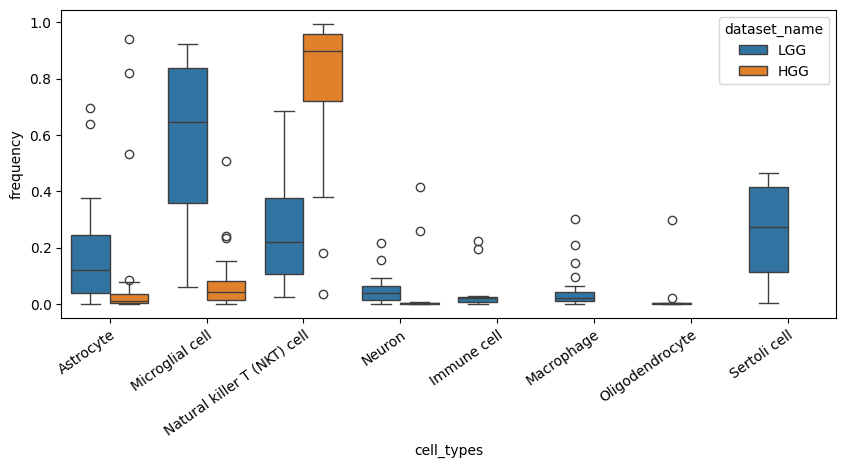

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,4))
ax = sns.boxplot(data = cell_type_counts, x = 'cell_types', y = 'frequency', hue = 'dataset_name')
plt.xticks(rotation = 35, rotation_mode = 'anchor', ha = 'right')
plt.show()

/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


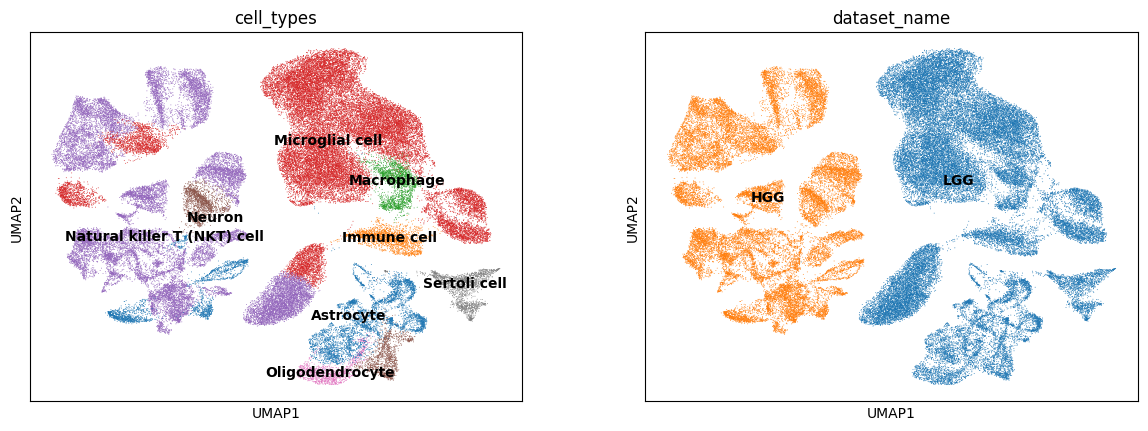

In [ ]:
sc.pl.umap(adata, color=['cell_types', 'dataset_name'], frameon = True, legend_loc = "on data")

categories: Astrocyte, Immune cell, Macrophage, etc.
var_group_labels: 1, 6


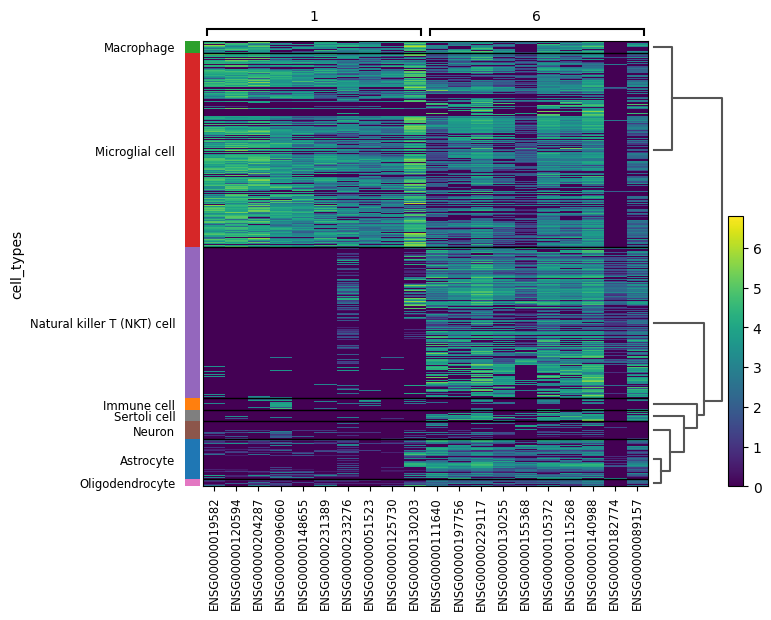

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata, groups="16", n_genes=10, groupby="cell_types")
#sc.pl.heatmap(adata, adata.var_names, groupby='leiden')

In [ ]:
# prompt: increase the size of the sc.pl.rank_genes_groups plot by setting the height and width

sc.pl.rank_genes_groups_heatmap(adata, groups="16", n_genes=10, groupby="cell_types", figsize=(10, 10))


categories: LGG, HGG
var_group_labels: 0, 1, 2, etc.


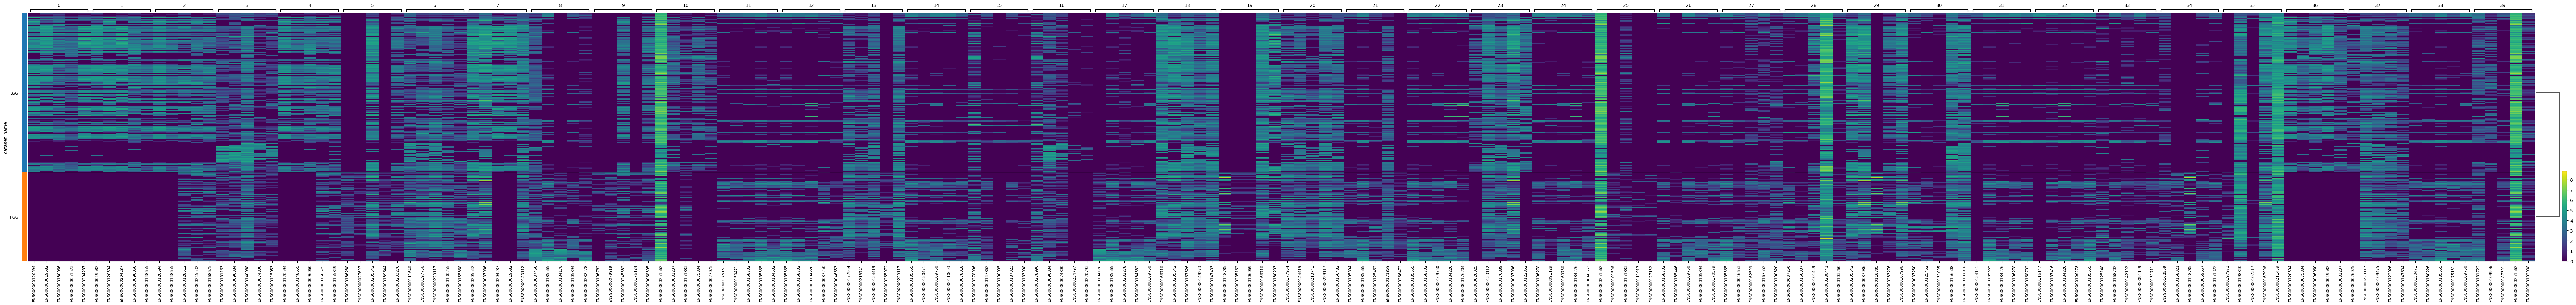

In [ ]:
sc.pl.rank_genes_groups_heatmap(adata, show_gene_labels=True, groupby="dataset_name", n_genes=5, figsize=(100, 10))

In [ ]:
adata.write_h5ad('/content/drive/MyDrive/Transcriptomics/SCPC/pre-dge-adata.h5ad')

In [ ]:
adata = sc.read_h5ad('/content/drive/MyDrive/Transcriptomics/SCPC/pre-dge-adata.h5ad')